In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, Flatten, Dense, Dropout, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [2]:
data_link = "D:/NobleTasks/ML Team/Data for ML.xlsx"
data = pd.read_excel(data_link)

In [3]:
data

,ID,First Name,Age,Country,City,Timezone,EduQuest Date,Explorer ID,Cohort
0,5272,Albina,16.0,Ukraine,Kyiv,GMT+03:00,2023-08-11,explorerxx19b,AUG 11 WD 23
1,40345,Ceren,16.0,Turkey,Istanbul,GMT+03:00,2023-08-11,explorerR160r,AUG 11 WD 23
2,40438,Dipin,20.0,Nepal,Katmandu,GMT+05:45,2023-08-11,explorerwGnIi,AUG 11 WD 23
3,40657,Violeta,25.0,United states,New_york,GMT-04:00,2023-08-11,explorer6U2l8,AUG 11 WD 23
4,40291,Cansu,17.0,Turkey,Istanbul,GMT+03:00,2023-08-11,exploreryVa0H,AUG 11 WD 23
...,...,...,...,...,...,...,...,...,...
2678,6681aa2864338e92bf7b9a45,Mursal,15.0,Afghanistan,Kabul,Asia/Kabul,2024-07-22,explorerVG35I,JUL 22 WE 24
2679,66797ec06afce5f1736ff089,Ohiorenoya,46.0,United Arab Emirates,Dubai,Asia/Dubai,2024-07-22,explorerXYw1J,JUL 22 WE 24
2680,6680191ab2e0f80a5c739338,Sasanka,30.0,India,Navi Mumbai,Asia/Kolkata,2024-07-22,explorerzXJmK,JUL 22 WE 24
2681,667f88e061f4af49f18da1d0,Shreejan,18.0,Nepal,Kathmandu,Asia/Kathmandu,2024-07-22,explorerRnFUb,JUL 22 WE 24


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             2681 non-null   object        
 1   First Name     2683 non-null   object        
 2   Age            2677 non-null   float64       
 3   Country        2683 non-null   object        
 4   City           2677 non-null   object        
 5   Timezone       2668 non-null   object        
 6   EduQuest Date  2683 non-null   datetime64[ns]
 7   Explorer ID    2683 non-null   object        
 8   Cohort         2683 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 188.8+ KB


In [5]:
data.describe()

,Age,EduQuest Date
count,2677.000000,2683
mean,26.223011,2024-02-02 21:30:47.633246208
min,-2.000000,2023-08-11 00:00:00
25%,18.000000,2023-11-18 00:00:00
50%,21.000000,2024-02-03 00:00:00
75%,27.000000,2024-05-06 00:00:00
max,2021.000000,2024-07-22 00:00:00
std,77.480071,NaN


In [6]:
country_counts = data['Country'].value_counts()
# Display the counts
print(country_counts)

Country
Nigeria            748
Turkey             460
Nepal              256
Ukraine            244
Kazakhstan         152
                  ... 
Burkina Faso         1
Algeria              1
Bulgaria             1
Unknown country      1
Thailand             1
Name: count, Length: 104, dtype: int64


In [7]:
#top 10 countries
country_counts = data['Country'].value_counts()

# Get the top 10 countries
top_10_countries = country_counts.nlargest(10)

# Display the top 10 countries
print(top_10_countries)


Country
Nigeria        748
Turkey         460
Nepal          256
Ukraine        244
Kazakhstan     152
Pakistan       124
Uzbekistan     113
Afghanistan     73
Ghana           68
Bangladesh      65
Name: count, dtype: int64


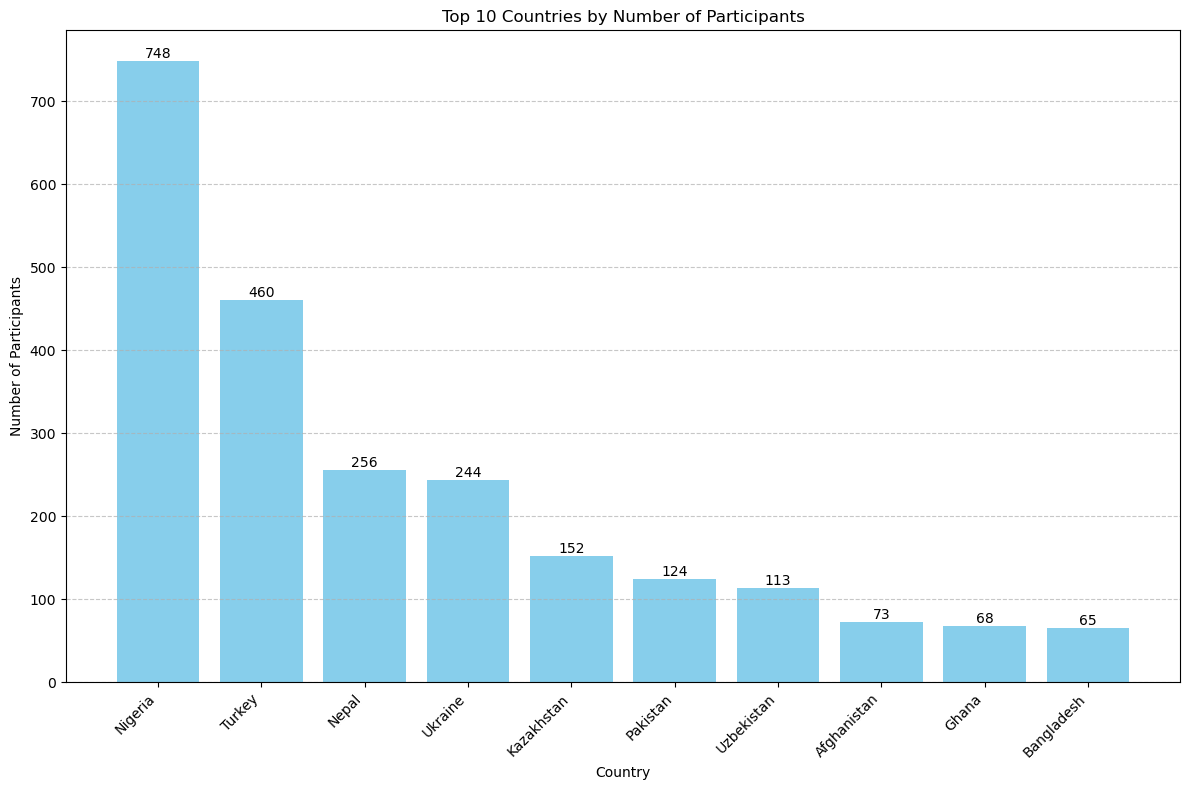

In [8]:
# Convert to DataFrame
top_10_df = pd.DataFrame(list(top_10_countries.items()), columns=['Country', 'Count'])

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_df['Country'], top_10_df['Count'], color='skyblue')

# Adding labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height()}', ha='center', va='bottom')

plt.title('Top 10 Countries by Number of Participants')
plt.xlabel('Country')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjusts plot to fit labels
plt.show()

In [9]:
# # Group by date and cohort, then sum the participants
# cohort_data = data.groupby('Cohort')

In [10]:
data['Cohort']

0       AUG 11 WD 23
1       AUG 11 WD 23
2       AUG 11 WD 23
3       AUG 11 WD 23
4       AUG 11 WD 23
            ...     
2678    JUL 22 WE 24
2679    JUL 22 WE 24
2680    JUL 22 WE 24
2681    JUL 22 WE 24
2682    JUL 22 WE 24
Name: Cohort, Length: 2683, dtype: object

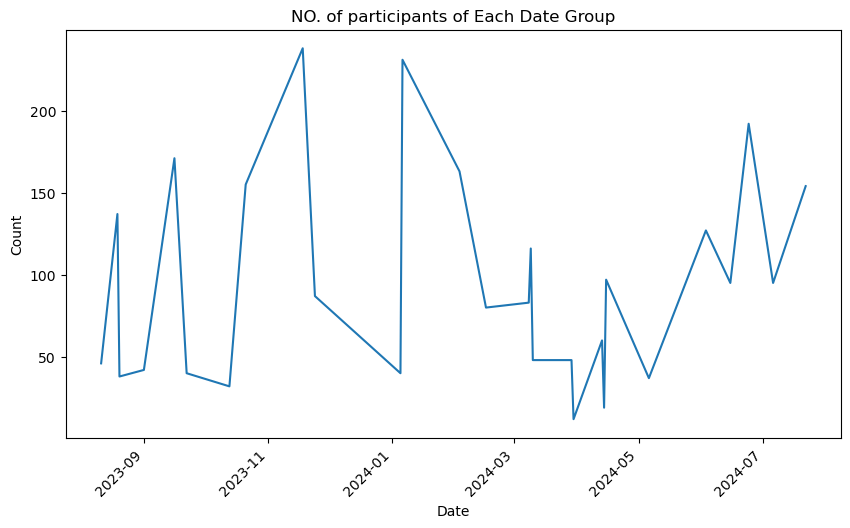

In [12]:
# Group and count occurrences
grouped_data = data['EduQuest Date'].value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='line')
plt.title('NO. of participants of Each Date Group')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
#Dropping some columns
new_data = data.drop(columns=["Explorer ID","ID","First Name","City"])

In [14]:
# Checking number of null values in particular column
print(new_data.isnull().sum())


Age               6
Country           0
Timezone         15
EduQuest Date     0
Cohort            0
dtype: int64


In [15]:
# Checking total number of null values in whole datasets
print(new_data.isnull().sum().sum())

21


In [16]:
# Filling the missing values
new_data.fillna({'Age': new_data['Age'].median()}, inplace=True)
new_data.fillna({'Timezone': new_data['Timezone'].mode()[0]}, inplace=True)

In [17]:
# Finding and fixing outliers of Age column
# Calculating IQR and listing outliers
Q1 = new_data['Age'].quantile(0.25)
Q3 = new_data['Age'].quantile(0.75)
IQR = Q3 - Q1

In [18]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
outliers = new_data[(new_data['Age'] < lower_bound) | (new_data['Age'] > upper_bound)].head()

# Replacing the outliers with median age
median_age = new_data['Age'].median()
new_data['Age'] = new_data['Age'].apply(lambda x: median_age if x < lower_bound or x > upper_bound else x)

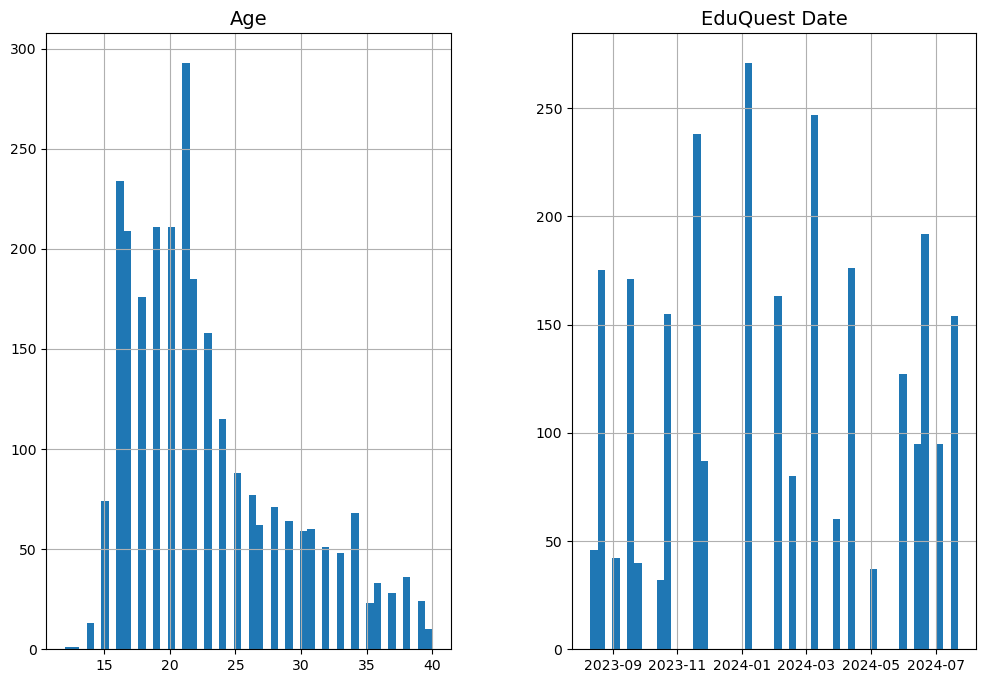

In [20]:
plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
new_data.hist(bins=50, figsize = (12, 8))
plt.show()

In [21]:
new_data['Country'].nunique()

104

In [22]:
new_data['EduQuest Date'].nunique()

28

In [23]:
new_data['Timezone'].nunique()

86

In [24]:
new_data['Cohort'].nunique()

26

In [25]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Age            2683 non-null   float64       
 1   Country        2683 non-null   object        
 2   Timezone       2683 non-null   object        
 3   EduQuest Date  2683 non-null   datetime64[ns]
 4   Cohort         2683 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 104.9+ KB


In [26]:
# from sklearn.feature_extraction import FeatureHasher

# # Age - Leave it as is or apply scaling if necessary
# age_series = new_data['Age']

# # Country
# hasher_country = FeatureHasher(n_features=128, input_type='string')
# hashed_country = hasher_country.transform([[country] for country in new_data['Country'].astype(str)])
# hashed_country_df = pd.DataFrame(hashed_country.toarray())

# # Timezone
# hasher_timezone = FeatureHasher(n_features=128, input_type='string')
# hashed_timezone = hasher_timezone.transform([[timezone] for timezone in new_data['Timezone'].astype(str)])
# hashed_timezone_df = pd.DataFrame(hashed_timezone.toarray())

# # EduQuest Date (converted to string)
# hasher_eduquest = FeatureHasher(n_features=128, input_type='string')
# hashed_eduquest = hasher_eduquest.transform([[date] for date in new_data['EduQuest Date'].astype(str)])
# hashed_eduquest_df = pd.DataFrame(hashed_eduquest.toarray())

# # Cohort
# hasher_cohort = FeatureHasher(n_features=128, input_type='string')
# hashed_cohort = hasher_cohort.transform([[cohort] for cohort in new_data['Cohort'].astype(str)])
# hashed_cohort_df = pd.DataFrame(hashed_cohort.toarray())

# # Combine the hashed features with the Age column
# hashed_data = pd.concat([age_series, hashed_country_df, hashed_timezone_df, hashed_eduquest_df, hashed_cohort_df], axis=1)

# # Display the resulting DataFrame
# print(hashed_data.head())


In [27]:
df_cat = new_data.select_dtypes(include=['object'])  # Select categorical columns
df_eduquest_date = new_data.select_dtypes(include=['datetime'])
df_num = new_data.select_dtypes(include=['number'])  # Select numeric columns

In [28]:
#df_eduquest_date['EduQuest Date'] = pd.to_datetime(df_eduquest_date['EduQuest Date'])


df_eduquest_date['year'] = df_eduquest_date['EduQuest Date'].dt.year
df_eduquest_date['month'] = df_eduquest_date['EduQuest Date'].dt.month
df_eduquest_date['day'] = df_eduquest_date['EduQuest Date'].dt.day

In [29]:
df_ymd = df_eduquest_date.drop(columns=["EduQuest Date"])
df_ymd

,year,month,day
0,2023,8,11
1,2023,8,11
2,2023,8,11
3,2023,8,11
4,2023,8,11
...,...,...,...
2678,2024,7,22
2679,2024,7,22
2680,2024,7,22
2681,2024,7,22


In [30]:
#df3 = pd.get_dummies(df_eduquest_date, drop_first=True)  # Apply one-hot encoding
#df3

In [31]:
# df_cat_concat = pd.concat([df_cat, df_eduquest_date], axis=1)

# print(df_cat_concat.head())

In [32]:
#Convert categorical variables to numerical using one-hot encoding
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)  # Apply one-hot encoding
df_cat_encoded

,Country_Africa,Country_Algeria,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Belgium,...,Cohort_MAR 8 WE 24,Cohort_MAR 9 WE 24,Cohort_MAY 6 WD 24,Cohort_NOV 18 WE 23,Cohort_NOV 24 WD 23,Cohort_OCT 13 WD 23,Cohort_OCT 21 WE 23,Cohort_SEP 1 WD 23,Cohort_SEP 16 WE 23,Cohort_SEP 22 WD 23
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
#Identify boolean columns and convert them to numeric
boolean_cols = df_cat_encoded.columns[df_cat_encoded.dtypes == 'bool']

df_cat_encoded[boolean_cols] = df_cat_encoded[boolean_cols].astype(int)
df_cat_encoded

,Country_Africa,Country_Algeria,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Belgium,...,Cohort_MAR 8 WE 24,Cohort_MAR 9 WE 24,Cohort_MAY 6 WD 24,Cohort_NOV 18 WE 23,Cohort_NOV 24 WD 23,Cohort_OCT 13 WD 23,Cohort_OCT 21 WE 23,Cohort_SEP 1 WD 23,Cohort_SEP 16 WE 23,Cohort_SEP 22 WD 23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Concatenate the numerical and encoded categorical columns
df_ml = pd.concat([df_num, df_cat_encoded,df_ymd], axis=1)  # Concatenate along columns (axis=1)

In [35]:
#Display the first few rows of the combined DataFrame
df_ml.tail(12)

,Age,Country_Africa,Country_Algeria,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,...,Cohort_NOV 18 WE 23,Cohort_NOV 24 WD 23,Cohort_OCT 13 WD 23,Cohort_OCT 21 WE 23,Cohort_SEP 1 WD 23,Cohort_SEP 16 WE 23,Cohort_SEP 22 WD 23,year,month,day
2671,24.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22
2672,16.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22
2673,17.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22
2674,16.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22
2675,16.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22
2676,24.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22
2677,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22
2678,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22
2679,21.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22
2680,30.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22


In [36]:
y = df_ml['Age']
y

0       16.0
1       16.0
2       20.0
3       25.0
4       17.0
        ... 
2678    15.0
2679    21.0
2680    30.0
2681    18.0
2682    17.0
Name: Age, Length: 2683, dtype: float64

In [37]:
X = df_ml.drop(columns=["Age"])
X

,Country_Africa,Country_Algeria,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Belgium,...,Cohort_NOV 18 WE 23,Cohort_NOV 24 WD 23,Cohort_OCT 13 WD 23,Cohort_OCT 21 WE 23,Cohort_SEP 1 WD 23,Cohort_SEP 16 WE 23,Cohort_SEP 22 WD 23,year,month,day
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023,8,11
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023,8,11
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023,8,11
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023,8,11
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22
2679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22
2680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22
2681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2024,7,22


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

model = Sequential()

#First Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(216, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

#Second Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

#Third Convolutional Layer
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

#Flatten the output before feeding it into the dense layers
model.add(Flatten())

#Dense Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

#Output Layer
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

D:\Ananconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [41]:
# Convert to NumPy arrays if X_train and X_test are DataFrames
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

# Reshape the arrays to include the channel dimension
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [42]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    verbose=2)

Epoch 1/50


D:\Ananconda\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


68/68 - 8s - 114ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


D:\Ananconda\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


Epoch 2/50
68/68 - 1s - 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
68/68 - 2s - 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/50
68/68 - 2s - 24ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
68/68 - 2s - 23ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/50
68/68 - 2s - 24ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
68/68 - 2s - 23ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/50
68/68 - 2s - 23ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
68/68 - 2s - 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0